# Association Rule

Association rules are a data mining technique used to find interesting relationships (associations) among variables in large datasets.

They are commonly used in market basket analysis.

**Example:**

“If a customer buys bread, they are likely to also buy butter.”

An association rule has the form:

**𝑋⇒𝑌**

X = antecedent (if part)

Y = consequent (then part)

## Metrics to Evaluate Rules

**Support**

How frequently the rule appears in the dataset.

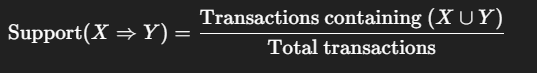

**Confidence**

Probability of Y given X.

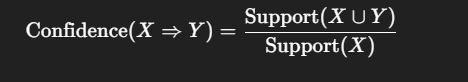

**Lift**

How much more likely Y is when X occurs compared to Y occurring by chance.

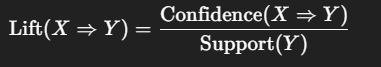
	​

### Apriori Algorithm

Apriori is a classic algorithm for mining frequent itemsets and generating association rules.

**Steps:**

* Set minimum support & confidence thresholds.

* Find frequent itemsets (items bought together frequently).

* Generate rules from these itemsets.

* Prune rules that don’t meet thresholds.

transactions as itemMatrix in sparse format with
 5 rows (elements/itemsets/transactions) and
 6 columns (items) and a density of 0.6 

most frequent items:
  Bread  Diaper    Milk    Beer    Cola (Other) 
      4       4       4       3       2       1 

element (itemset/transaction) length distribution:
sizes
2 4 
1 4 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    2.0     4.0     4.0     3.6     4.0     4.0 

includes extended item information - examples:
  labels
1   Beer
2  Bread
3   Cola

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.6    0.1    1 none FALSE            TRUE       5     0.2      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[6 item(s), 5 transaction(s)] done [0.00s].
sorting and recoding items ... [6 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [49 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
     lhs                      rhs      support confidence coverage lift     
[1]  {}                    => {Beer}   0.6     0.6000000  1.0      1.0000000
[2]  {}                    => {Milk}   0.8     0.8000000  1.0      1.0000000
[3]  {}                    => {Bread}  0.8     0.8000000  1.0  

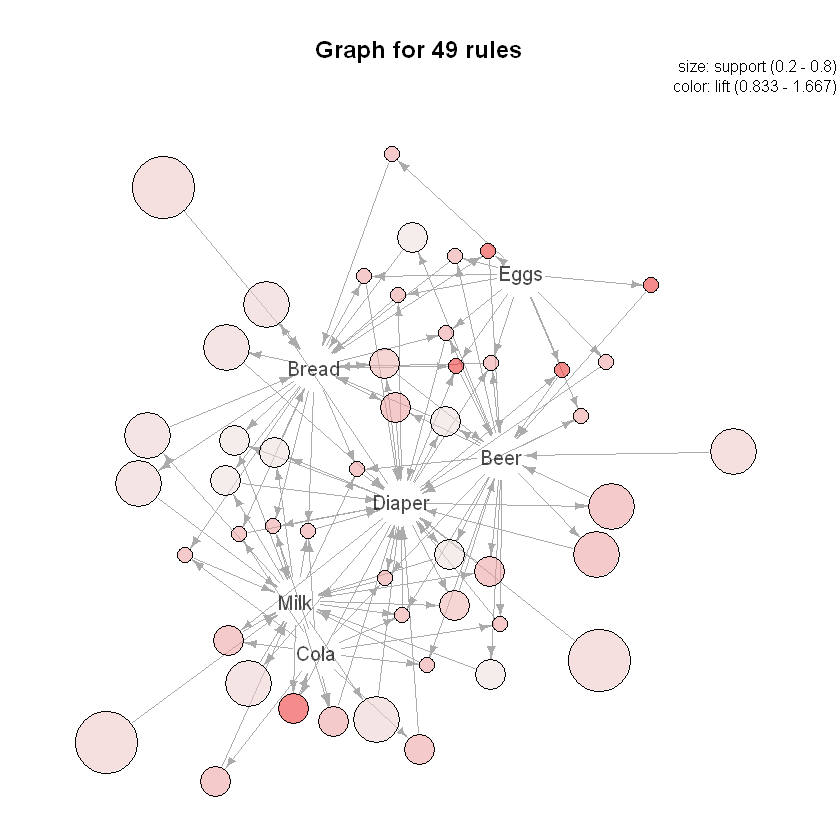

In [7]:
# Install packages if not installed
# install.packages("arules")
# install.packages("arulesViz")

library(arules)
library(arulesViz)

# Example transactions
transactions_list <- list(
  c("Bread", "Milk"),
  c("Bread", "Diaper", "Beer", "Eggs"),
  c("Milk", "Diaper", "Beer", "Cola"),
  c("Bread", "Milk", "Diaper", "Beer"),
  c("Bread", "Milk", "Diaper", "Cola")
)

# Convert to transactions object
trans <- as(transactions_list, "transactions")

# Summary
summary(trans)

# Apply Apriori Algorithm
rules <- apriori(trans, parameter = list(support = 0.2, confidence = 0.6))

# Inspect rules
inspect(rules)

# Plot rules as a tree
plot(rules, method = "graph", engine = "igraph")  # nice tree/graph view


In [8]:

# Extract only metrics (Support, Confidence, Lift)
metrics <- quality(rules)
metrics

,support,confidence,coverage,lift,count
,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,0.6,0.6000000,1.0,1.0000000,3
2,0.8,0.8000000,1.0,1.0000000,4
3,0.8,0.8000000,1.0,1.0000000,4
4,0.8,0.8000000,1.0,1.0000000,4
5,0.2,1.0000000,0.2,1.6666667,1
6,0.2,1.0000000,0.2,1.2500000,1
7,0.2,1.0000000,0.2,1.2500000,1
8,0.4,1.0000000,0.4,1.2500000,2
9,0.4,1.0000000,0.4,1.2500000,2


## Summary
| Step                              | Description                                                                              |
| --------------------------------- | ---------------------------------------------------------------------------------------- |
| **1. Set Thresholds**             | Choose minimum **support** and **confidence** values.                                    |
| **2. Generate Frequent Itemsets** | Find items that appear together in transactions more often than the minimum **support**. |
| **3. Create Candidate Rules**     | From frequent itemsets, generate possible **if–then rules** (X ⇒ Y).                     |
| **4. Calculate Metrics**          | For each rule, compute **Support**, **Confidence**, and **Lift**.                        |
| **5. Prune Rules**                | Remove rules that do not meet minimum **confidence** or other thresholds.                |
| **6. Output Strong Rules**        | The remaining rules are the most meaningful associations.                                |


### Evaluation Metrics

| Metric         | Formula                                                                                                          | Meaning                                                     |
| -------------- | ---------------------------------------------------------------------------------------------------------------- | ----------------------------------------------------------- |
| **Support**    | $\text{Support}(X \Rightarrow Y) = \frac{\text{Transactions containing } (X \cup Y)}{\text{Total Transactions}}$ | Frequency of the rule in the dataset.                       |
| **Confidence** | $\text{Confidence}(X \Rightarrow Y) = \frac{\text{Support}(X \cup Y)}{\text{Support}(X)}$                        | Probability of Y given X.                                   |
| **Lift**       | $\text{Lift}(X \Rightarrow Y) = \frac{\text{Confidence}(X \Rightarrow Y)}{\text{Support}(Y)}$                    | How much more likely Y is if X occurs (compared to chance). |
